# Data Analytics: Machine Learning para Marketing Digital
***
Projeto baseado no curso Alura - Data Analytics: Machine Learning para Marketing Digital, com o objetivo de fazer a previsão de vendas da Google Merchandise Store, a partir dos dados disponibilizados pelo Google Analytics.

O que foi aprendido?
- Regressão Linear
- Gradient Boosting
- Label Encoder

Palavras-chave: Regressão Linear, Gradient Boosting, Label Encoder, JSON, Feature Engineering.

# Carregando a base de dados

In [ ]:
uri = 'https://raw.githubusercontent.com/alura-cursos/digital-marketing-ml/master/train.csv'

In [ ]:
import pandas as pd

df = pd.read_csv(uri)

In [ ]:
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671


In [ ]:
df.shape

(12283, 12)

In [ ]:
len(df['fullVisitorId'].unique())

9996

In [ ]:
df.dtypes

channelGrouping         object
date                     int64
device                  object
fullVisitorId           uint64
geoNetwork              object
sessionId               object
socialEngagementType    object
totals                  object
trafficSource           object
visitId                  int64
visitNumber              int64
visitStartTime           int64
dtype: object

In [ ]:
data = df['date'].iloc[0]

In [ ]:
type(data)

numpy.int64

In [ ]:
data = str(df['date'].iloc[0])

In [ ]:
data[0:4]

'2016'

In [ ]:
numero = int('00123')

In [ ]:
numero

123

In [ ]:
df = pd.read_csv(uri, dtype = {'date':object,
                                'fullVisitorId':object,
                                'VisitId':object})

In [ ]:
df.dtypes

channelGrouping         object
date                    object
device                  object
fullVisitorId           object
geoNetwork              object
sessionId               object
socialEngagementType    object
totals                  object
trafficSource           object
visitId                  int64
visitNumber              int64
visitStartTime           int64
dtype: object

In [ ]:
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671


# Formato de dados

# Trabalhando com dicionários

In [ ]:
df['device'].iloc[0]

'{"browser": "Chrome", "browserVersion": "not available in demo dataset", "browserSize": "not available in demo dataset", "operatingSystem": "Windows", "operatingSystemVersion": "not available in demo dataset", "isMobile": false, "mobileDeviceBranding": "not available in demo dataset", "mobileDeviceModel": "not available in demo dataset", "mobileInputSelector": "not available in demo dataset", "mobileDeviceInfo": "not available in demo dataset", "mobileDeviceMarketingName": "not available in demo dataset", "flashVersion": "not available in demo dataset", "language": "not available in demo dataset", "screenColors": "not available in demo dataset", "screenResolution": "not available in demo dataset", "deviceCategory": "desktop"}'

In [ ]:
type(df['device'].iloc[0])

str

In [ ]:
import json

In [ ]:
type(json.loads(df['device'].iloc[0]))

dict

In [ ]:
pd.DataFrame([json.loads(linha) for linha in df.device])

,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory
0,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
1,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
2,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
3,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile
4,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12278,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
12279,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile
12280,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
12281,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile


In [ ]:
dicionarios = ['device', 'geoNetwork', 'trafficSource', 'totals']

In [ ]:
for coluna in dicionarios:
  df = df.join(pd.DataFrame([json.loads(linha) for linha in df[coluna]]))

In [ ]:
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,...,isTrueDirect,referralPath,adContent,campaignCode,visits,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,...,True,NaN,NaN,NaN,1,1,1,1,NaN,NaN
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,...,NaN,NaN,NaN,NaN,1,5,4,NaN,1,NaN


In [ ]:
df.drop(dicionarios, axis = 1, inplace = True)

In [ ]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,browser,browserVersion,...,isTrueDirect,referralPath,adContent,campaignCode,visits,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,Not Socially Engaged,1472804607,1,1472804607,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,Not Socially Engaged,1472835928,1,1472835928,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,Not Socially Engaged,1472856802,1,1472856802,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,Not Socially Engaged,1472879649,2,1472879649,Safari,not available in demo dataset,...,True,NaN,NaN,NaN,1,1,1,1,NaN,NaN
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,Not Socially Engaged,1472829671,1,1472829671,Safari,not available in demo dataset,...,NaN,NaN,NaN,NaN,1,5,4,NaN,1,NaN


# Limpando a base de dados

In [ ]:
len(df['channelGrouping'].unique())

8

In [ ]:
df.drop('adwordsClickInfo', axis = 1, inplace = True)

In [ ]:
coluna_na = []

In [ ]:
for coluna in df.columns:
  print(coluna + ': ' + str(len(df[coluna].unique())))
  if len(df[coluna].unique()) == 1:
    coluna_na.append(coluna)

channelGrouping: 8
date: 366
fullVisitorId: 9997
sessionId: 12276
socialEngagementType: 1
visitId: 12272
visitNumber: 50
visitStartTime: 12279
browser: 22
browserVersion: 1
browserSize: 1
operatingSystem: 12
operatingSystemVersion: 1
isMobile: 2
mobileDeviceBranding: 1
mobileDeviceModel: 1
mobileInputSelector: 1
mobileDeviceInfo: 1
mobileDeviceMarketingName: 1
flashVersion: 1
language: 1
screenColors: 1
screenResolution: 1
deviceCategory: 3
continent: 6
subContinent: 22
country: 145
region: 212
metro: 53
city: 296
cityId: 1
networkDomain: 1747
latitude: 1
longitude: 1
networkLocation: 1
campaign: 7
source: 76
medium: 7
keyword: 129
isTrueDirect: 2
referralPath: 198
adContent: 16
campaignCode: 2
visits: 1
hits: 96
pageviews: 75
bounces: 2
newVisits: 2
transactionRevenue: 147


In [ ]:
coluna_na

['socialEngagementType',
 'browserVersion',
 'browserSize',
 'operatingSystemVersion',
 'mobileDeviceBranding',
 'mobileDeviceModel',
 'mobileInputSelector',
 'mobileDeviceInfo',
 'mobileDeviceMarketingName',
 'flashVersion',
 'language',
 'screenColors',
 'screenResolution',
 'cityId',
 'latitude',
 'longitude',
 'networkLocation',
 'visits']

In [ ]:
df.drop(coluna_na, axis = 1, inplace = True)

In [ ]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,...,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,...,(not provided),NaN,NaN,NaN,NaN,1,1,1,1,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,...,(not provided),NaN,NaN,NaN,NaN,1,1,1,1,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,...,NaN,NaN,NaN,NaN,NaN,1,1,1,1,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,...,(not provided),True,NaN,NaN,NaN,1,1,1,NaN,NaN
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,...,(not provided),NaN,NaN,NaN,NaN,5,4,NaN,1,NaN


# Entendendo as variáveis

# Corrigindo variáveis quantitativas

In [ ]:
df.dtypes

channelGrouping       object
date                  object
fullVisitorId         object
sessionId             object
visitId                int64
visitNumber            int64
visitStartTime         int64
browser               object
operatingSystem       object
isMobile                bool
deviceCategory        object
continent             object
subContinent          object
country               object
region                object
metro                 object
city                  object
networkDomain         object
campaign              object
source                object
medium                object
keyword               object
isTrueDirect          object
referralPath          object
adContent             object
campaignCode          object
hits                  object
pageviews             object
bounces               object
newVisits             object
transactionRevenue    object
dtype: object

In [ ]:
quant = ['bounces', 'hits', 'newVisits', 'pageviews', 'transactionRevenue']

In [ ]:
for coluna in quant:
  df[coluna] = pd.to_numeric(df[coluna])

In [ ]:
df.dtypes

channelGrouping        object
date                   object
fullVisitorId          object
sessionId              object
visitId                 int64
visitNumber             int64
visitStartTime          int64
browser                object
operatingSystem        object
isMobile                 bool
deviceCategory         object
continent              object
subContinent           object
country                object
region                 object
metro                  object
city                   object
networkDomain          object
campaign               object
source                 object
medium                 object
keyword                object
isTrueDirect           object
referralPath           object
adContent              object
campaignCode           object
hits                    int64
pageviews               int64
bounces               float64
newVisits             float64
transactionRevenue    float64
dtype: object

In [ ]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,...,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,...,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,...,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,...,NaN,NaN,NaN,NaN,NaN,1,1,1.0,1.0,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,...,(not provided),True,NaN,NaN,NaN,1,1,1.0,NaN,NaN
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,...,(not provided),NaN,NaN,NaN,NaN,5,4,NaN,1.0,NaN


# Tratando a variável resposta

In [ ]:
df['transactionRevenue'].value_counts()

13590000.0     3
19190000.0     3
33590000.0     3
31490000.0     2
69990000.0     2
              ..
22490000.0     1
74850000.0     1
32490000.0     1
239880000.0    1
25240000.0     1
Name: transactionRevenue, Length: 146, dtype: int64

In [ ]:
df['transactionRevenue'].isna().sum()

12119

In [ ]:
df['transactionRevenue'].fillna(0, inplace = True)

In [ ]:
df['transactionRevenue']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12278    0.0
12279    0.0
12280    0.0
12281    0.0
12282    0.0
Name: transactionRevenue, Length: 12283, dtype: float64

In [ ]:
df['transactionRevenue'].value_counts()

0.0           12119
13590000.0        3
33590000.0        3
19190000.0        3
27190000.0        2
              ...  
24730000.0        1
6990000.0         1
14480000.0        1
95180000.0        1
25240000.0        1
Name: transactionRevenue, Length: 147, dtype: int64

In [ ]:
#formato real

df['transactionRevenue'] = df['transactionRevenue'] / 1000000

In [ ]:
df['transactionRevenue'].value_counts()

0.00     12119
13.59        3
33.59        3
19.19        3
27.19        2
         ...  
24.73        1
6.99         1
14.48        1
95.18        1
25.24        1
Name: transactionRevenue, Length: 147, dtype: int64

# Criando variáveis

In [ ]:
df_quant = df.groupby('fullVisitorId', as_index = False)[quant].sum()

In [ ]:
df_quant.head()

,fullVisitorId,bounces,hits,newVisits,pageviews,transactionRevenue
0,0002365800130207040,1.0,1,1.0,1,0.0
1,0010286039787739137,0.0,4,1.0,3,0.0
2,0011056874471185769,0.0,2,1.0,2,0.0
3,0014443856125569702,1.0,1,1.0,1,0.0
4,0017260116665815114,0.0,2,0.0,2,0.0


In [ ]:
df_quant.shape

(9997, 6)

# Bases treino e teste

In [ ]:
y = df_quant['transactionRevenue'].copy()

In [ ]:
x = df_quant.drop('transactionRevenue', axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
x_train.head()

,fullVisitorId,bounces,hits,newVisits,pageviews
9066,9160012321913348805,0.0,16,1.0,12
2603,3214687528122048939,1.0,1,1.0,1
8832,8936592721963873590,0.0,13,1.0,13
1579,2277422319005476191,1.0,1,1.0,1
9887,989458850703391704,1.0,1,1.0,1


In [ ]:
y_train.head()

9066    144.97
2603      0.00
8832      6.99
1579      0.00
9887      0.00
Name: transactionRevenue, dtype: float64

In [ ]:
x_train.shape

(6997, 5)

In [ ]:
y_train.shape

(6997,)

In [ ]:
x_test.shape

(3000, 5)

# Treinando uma regressão linear

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
reg_predict = reg.predict(x_test)

In [ ]:
reg_predict

array([1.55166047, 1.55520911, 1.68772647, ..., 1.61310964, 1.52678998,
       1.58119137])

In [ ]:
x_test.head()

,fullVisitorId,bounces,hits,newVisits,pageviews
4122,4578458064892235105,1.0,1,1.0,1
4065,4521976094244865667,0.0,2,1.0,2
1731,2412763304338054923,1.0,1,1.0,1
4740,5154139143679150892,0.0,6,1.0,5
6391,6631771261952767652,0.0,7,1.0,7


# Avaliando os resultados

In [ ]:
resultados = pd.DataFrame()

In [ ]:
resultados['revenue'] = y_test
resultados['predict'] = reg_predict
resultados['erro'] = reg_predict - y_test

In [ ]:
resultados.head()

,revenue,predict,erro
4122,0.0,1.551660,1.551660
4065,0.0,1.555209,1.555209
1731,0.0,1.687726,1.687726
4740,0.0,1.515492,1.515492
6391,0.0,1.422655,1.422655


In [ ]:
resultados[resultados['revenue'] > 0]

,revenue,predict,erro
3006,32.49,1.616211,-30.873789
5928,74.85,1.449755,-73.400245
8361,424.50,1.306194,-423.193806
8612,55.99,1.291322,-54.698678
416,15.19,1.831725,-13.358275
4077,5.97,1.554336,-4.415664
8146,27.19,1.318915,-25.871085
4908,372.65,1.505642,-371.144358
9395,29.98,1.779852,-28.200148
8728,101.95,1.284318,-100.665682


In [ ]:
import numpy as np

In [ ]:
#MSE
np.mean((reg_predict - y_test)**2)

807.245929682092

In [ ]:
# RMSE
np.sqrt(np.mean((reg_predict - y_test)**2))

28.412073660366502

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
np.sqrt(mean_squared_error(y_test, reg_predict))

28.412073660366516

In [ ]:
np.mean(df_quant['transactionRevenue'])

1.778953686105831

In [ ]:
np.std(df_quant['transactionRevenue'])

25.129905708017944

# Análise gráfica dos resultados

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


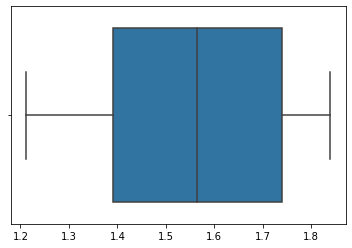

In [ ]:
sns.boxplot(reg_predict)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


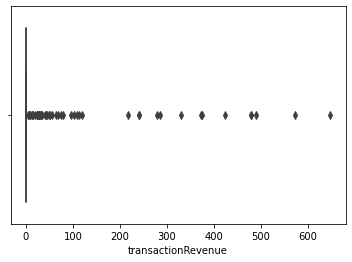

In [ ]:
sns.boxplot(y_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


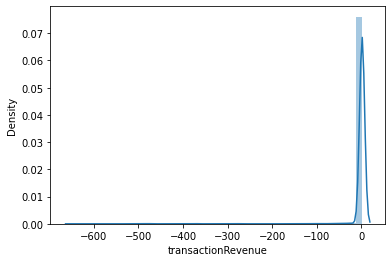

In [ ]:
sns.distplot(reg_predict - y_test)

# Criando variáveis qualitativas

In [ ]:
visitas_ultima = df.groupby('fullVisitorId', as_index = False)

In [ ]:
visitas_ultima['visitNumber'].max()

,fullVisitorId,visitNumber
0,0002365800130207040,1
1,0010286039787739137,1
2,0011056874471185769,1
3,0014443856125569702,1
4,0017260116665815114,6
...,...,...
9992,9996691020299725061,3
9993,9996793353803109760,1
9994,9997125062030599880,1
9995,9997464307347866920,1


# Retornando valores da última visita

In [ ]:
visitas_ultima = visitas_ultima['visitNumber'].max()

In [ ]:
visitas_ultima.head()

,fullVisitorId,visitNumber
0,0002365800130207040,1
1,0010286039787739137,1
2,0011056874471185769,1
3,0014443856125569702,1
4,0017260116665815114,6


In [ ]:
usuarios_visita_unicos = df.drop_duplicates(subset = ['fullVisitorId', 'visitNumber'])

In [ ]:
usuarios_visita_unicos.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,...,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,...,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,...,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,...,NaN,NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,...,(not provided),True,NaN,NaN,NaN,1,1,1.0,NaN,0.0
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,...,(not provided),NaN,NaN,NaN,NaN,5,4,NaN,1.0,0.0


In [ ]:
usuarios_visita_unicos.shape

(12270, 31)

In [ ]:
visitas = pd.merge(visitas_ultima, usuarios_visita_unicos, left_on = ['fullVisitorId', 'visitNumber'],
                   right_on = ['fullVisitorId', 'visitNumber'], how = 'left')

In [ ]:
visitas.head()

,fullVisitorId,visitNumber,channelGrouping,date,sessionId,visitId,visitStartTime,browser,operatingSystem,isMobile,...,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,...,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1,1.0,1.0,0.0
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,...,(not provided),NaN,NaN,NaN,NaN,4,3,NaN,1.0,0.0
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,...,NaN,NaN,/yt/about/,NaN,NaN,2,2,NaN,1.0,0.0
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,...,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1,1.0,1.0,0.0
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,...,NaN,True,NaN,NaN,NaN,2,2,NaN,NaN,0.0


In [ ]:
visitas.shape

(9997, 31)

# Retornando valores da primeira visita

In [ ]:
visitas_primeira = df.groupby('fullVisitorId', as_index = False)

In [ ]:
visitas_primeira = visitas_primeira['visitNumber'].min()

In [ ]:
visitas_primeira.head()

,fullVisitorId,visitNumber
0,0002365800130207040,1
1,0010286039787739137,1
2,0011056874471185769,1
3,0014443856125569702,1
4,0017260116665815114,6


In [ ]:
visitas_primeira.set_index('fullVisitorId', inplace = True)

In [ ]:
visitas = visitas.join(visitas_primeira, how = 'left', on = 'fullVisitorId', rsuffix = 'primeira', )

In [ ]:
visitas.head()

,fullVisitorId,visitNumber,channelGrouping,date,sessionId,visitId,visitStartTime,browser,operatingSystem,isMobile,...,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue,visitNumberprimeira
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,...,NaN,/yt/about/ru/,NaN,NaN,1,1,1.0,1.0,0.0,1
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,...,NaN,NaN,NaN,NaN,4,3,NaN,1.0,0.0,1
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,...,NaN,/yt/about/,NaN,NaN,2,2,NaN,1.0,0.0,1
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,...,NaN,/yt/about/ro/,NaN,NaN,1,1,1.0,1.0,0.0,1
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,...,True,NaN,NaN,NaN,2,2,NaN,NaN,0.0,6


In [ ]:
visitas = pd.merge(visitas, usuarios_visita_unicos, left_on = ['fullVisitorId', 'visitNumberprimeira'],
                   right_on = ['fullVisitorId', 'visitNumber'], how = 'left', suffixes = ['_ultima', '_primeira'])

In [ ]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,sessionId_ultima,visitId_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,...,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira,hits_primeira,pageviews_primeira,bounces_primeira,newVisits_primeira,transactionRevenue_primeira
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,...,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1,1.0,1.0,0.0
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,...,(not provided),NaN,NaN,NaN,NaN,4,3,NaN,1.0,0.0
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,...,NaN,NaN,/yt/about/,NaN,NaN,2,2,NaN,1.0,0.0
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,...,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1,1.0,1.0,0.0
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,...,NaN,True,NaN,NaN,NaN,2,2,NaN,NaN,0.0


# Limpando a base de dados

In [ ]:
for coluna in quant:
  visitas.drop(coluna + '_ultima', axis = 1, inplace = True)
  visitas.drop(coluna + '_primeira', axis = 1, inplace = True)

In [ ]:
quant

['bounces', 'hits', 'newVisits', 'pageviews', 'transactionRevenue']

In [ ]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,sessionId_ultima,visitId_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,...,city_primeira,networkDomain_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,...,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,...,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,...,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,...,Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,...,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN


In [ ]:
ids = ['sessionId_ultima', 'visitId_ultima', 'sessionId_primeira', 'visitId_primeira']

In [ ]:
visitas.drop(ids, axis = 1, inplace = True)

In [ ]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,...,city_primeira,networkDomain_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,...,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,...,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,...,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,...,Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,...,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN


In [ ]:
visitas.columns

Index(['fullVisitorId', 'visitNumber_ultima', 'channelGrouping_ultima',
       'date_ultima', 'visitStartTime_ultima', 'browser_ultima',
       'operatingSystem_ultima', 'isMobile_ultima', 'deviceCategory_ultima',
       'continent_ultima', 'subContinent_ultima', 'country_ultima',
       'region_ultima', 'metro_ultima', 'city_ultima', 'networkDomain_ultima',
       'campaign_ultima', 'source_ultima', 'medium_ultima', 'keyword_ultima',
       'isTrueDirect_ultima', 'referralPath_ultima', 'adContent_ultima',
       'campaignCode_ultima', 'visitNumberprimeira',
       'channelGrouping_primeira', 'date_primeira', 'visitNumber_primeira',
       'visitStartTime_primeira', 'browser_primeira',
       'operatingSystem_primeira', 'isMobile_primeira',
       'deviceCategory_primeira', 'continent_primeira',
       'subContinent_primeira', 'country_primeira', 'region_primeira',
       'metro_primeira', 'city_primeira', 'networkDomain_primeira',
       'campaign_primeira', 'source_primeira', 'medium

In [ ]:
geo = ['city_primeira', 'continent_primeira', 'country_primeira', 'region_primeira', 'metro_primeira', 'networkDomain_primeira', 'subContinent_primeira']

In [ ]:
visitas.drop(geo, axis = 1, inplace = True)

In [ ]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,...,isMobile_primeira,deviceCategory_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,...,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,...,False,desktop,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,...,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,...,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,...,False,desktop,(not set),(direct),(none),NaN,True,NaN,NaN,NaN


# Criando variáveis diversas

In [ ]:
df_quant.head()

,fullVisitorId,bounces,hits,newVisits,pageviews,transactionRevenue
0,0002365800130207040,1.0,1,1.0,1,0.0
1,0010286039787739137,0.0,4,1.0,3,0.0
2,0011056874471185769,0.0,2,1.0,2,0.0
3,0014443856125569702,1.0,1,1.0,1,0.0
4,0017260116665815114,0.0,2,0.0,2,0.0


In [ ]:
visitas = pd.merge(visitas, df_quant, left_on = ['fullVisitorId'],
                   right_on = ['fullVisitorId'], how = 'left')

In [ ]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,...,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira,bounces,hits,newVisits,pageviews,transactionRevenue
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,...,NaN,NaN,/yt/about/ru/,NaN,NaN,1.0,1,1.0,1,0.0
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,...,(not provided),NaN,NaN,NaN,NaN,0.0,4,1.0,3,0.0
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,...,NaN,NaN,/yt/about/,NaN,NaN,0.0,2,1.0,2,0.0
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,...,NaN,NaN,/yt/about/ro/,NaN,NaN,1.0,1,1.0,1,0.0
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,...,NaN,True,NaN,NaN,NaN,0.0,2,0.0,2,0.0


In [ ]:
visitas['tempo_dif'] = visitas['visitStartTime_ultima'] - visitas['visitStartTime_primeira']

In [ ]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,...,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira,bounces,hits,newVisits,pageviews,transactionRevenue,tempo_dif
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,...,NaN,/yt/about/ru/,NaN,NaN,1.0,1,1.0,1,0.0,0
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,...,NaN,NaN,NaN,NaN,0.0,4,1.0,3,0.0,0
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,...,NaN,/yt/about/,NaN,NaN,0.0,2,1.0,2,0.0,0
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,...,NaN,/yt/about/ro/,NaN,NaN,1.0,1,1.0,1,0.0,0
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,...,True,NaN,NaN,NaN,0.0,2,0.0,2,0.0,0


In [ ]:
visits = df.groupby('fullVisitorId', as_index = False).count()['visitNumber'].values

In [ ]:
visitas['visits'] = visits

In [ ]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,...,referralPath_primeira,adContent_primeira,campaignCode_primeira,bounces,hits,newVisits,pageviews,transactionRevenue,tempo_dif,visits
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,...,/yt/about/ru/,NaN,NaN,1.0,1,1.0,1,0.0,0,1
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,...,NaN,NaN,NaN,0.0,4,1.0,3,0.0,0,1
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,...,/yt/about/,NaN,NaN,0.0,2,1.0,2,0.0,0,1
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,...,/yt/about/ro/,NaN,NaN,1.0,1,1.0,1,0.0,0,1
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,...,NaN,NaN,NaN,0.0,2,0.0,2,0.0,0,1


In [ ]:
data = '20160904'

In [ ]:
data

'20160904'

In [ ]:
data[0:4]

'2016'

In [ ]:
data[4:6]

'09'

In [ ]:
data[6:]

'04'

In [ ]:
#SLICING
visitas['ano_ultima'] = pd.to_numeric([data[0:4] for data in visitas.date_ultima])
visitas['mes_ultima'] = pd.to_numeric([data[4:6] for data in visitas.date_ultima])
visitas['dia_ultima'] = pd.to_numeric([data[6:8] for data in visitas.date_ultima])

visitas['ano_primeira'] = pd.to_numeric([data[0:4] for data in visitas.date_primeira])
visitas['mes_primeira'] = pd.to_numeric([data[4:6] for data in visitas.date_primeira])
visitas['dia_primeira'] = pd.to_numeric([data[6:8] for data in visitas.date_primeira])

In [ ]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,...,pageviews,transactionRevenue,tempo_dif,visits,ano_ultima,mes_ultima,dia_ultima,ano_primeira,mes_primeira,dia_primeira
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,...,1,0.0,0,1,2016,9,4,2016,9,4
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,...,3,0.0,0,1,2016,9,28,2016,9,28
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,...,2,0.0,0,1,2016,12,5,2016,12,5
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,...,1,0.0,0,1,2016,10,2,2016,10,2
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,...,2,0.0,0,1,2017,4,20,2017,4,20


In [ ]:
visitas.dtypes

fullVisitorId                object
visitNumber_ultima            int64
channelGrouping_ultima       object
date_ultima                  object
visitStartTime_ultima         int64
browser_ultima               object
operatingSystem_ultima       object
isMobile_ultima                bool
deviceCategory_ultima        object
continent_ultima             object
subContinent_ultima          object
country_ultima               object
region_ultima                object
metro_ultima                 object
city_ultima                  object
networkDomain_ultima         object
campaign_ultima              object
source_ultima                object
medium_ultima                object
keyword_ultima               object
isTrueDirect_ultima          object
referralPath_ultima          object
adContent_ultima             object
campaignCode_ultima          object
visitNumberprimeira           int64
channelGrouping_primeira     object
date_primeira                object
visitNumber_primeira        

# Identificando os tipos das colunas

In [ ]:
visitas.drop('fullVisitorId', axis = 1, inplace = True)

In [ ]:
y = visitas.transactionRevenue.copy()

In [ ]:
x =  visitas.drop('transactionRevenue', axis = 1)

In [ ]:
x.head()

,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,...,newVisits,pageviews,tempo_dif,visits,ano_ultima,mes_ultima,dia_ultima,ano_primeira,mes_primeira,dia_primeira
0,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,...,1.0,1,0,1,2016,9,4,2016,9,4
1,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,...,1.0,3,0,1,2016,9,28,2016,9,28
2,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,...,1.0,2,0,1,2016,12,5,2016,12,5
3,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,...,1.0,1,0,1,2016,10,2,2016,10,2
4,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,...,0.0,2,0,1,2017,4,20,2017,4,20


In [ ]:
quali = visitas.dtypes[visitas.dtypes == object].keys()

In [ ]:
quali

Index(['channelGrouping_ultima', 'date_ultima', 'browser_ultima',
       'operatingSystem_ultima', 'deviceCategory_ultima', 'continent_ultima',
       'subContinent_ultima', 'country_ultima', 'region_ultima',
       'metro_ultima', 'city_ultima', 'networkDomain_ultima',
       'campaign_ultima', 'source_ultima', 'medium_ultima', 'keyword_ultima',
       'isTrueDirect_ultima', 'referralPath_ultima', 'adContent_ultima',
       'campaignCode_ultima', 'channelGrouping_primeira', 'date_primeira',
       'browser_primeira', 'operatingSystem_primeira',
       'deviceCategory_primeira', 'campaign_primeira', 'source_primeira',
       'medium_primeira', 'keyword_primeira', 'isTrueDirect_primeira',
       'referralPath_primeira', 'adContent_primeira', 'campaignCode_primeira'],
      dtype='object')

# Label encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
strings = list(x['operatingSystem_ultima'].values.astype('str'))

In [ ]:
lbl = LabelEncoder()

In [ ]:
lbl.fit(strings)

LabelEncoder()

In [ ]:
lbl.transform(strings)

array([ 9,  3,  9, ..., 11,  1,  9])

In [ ]:
for coluna in quali:
  lbl = LabelEncoder()
  strings = list(x[coluna].values.astype('str'))
  lbl.fit(strings)
  x[coluna] = lbl.transform(strings)

In [ ]:
x.head()

,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,...,newVisits,pageviews,tempo_dif,visits,ano_ultima,mes_ultima,dia_ultima,ano_primeira,mes_primeira,dia_primeira
0,1,7,34,1472974804,7,9,False,0,4,7,...,1.0,1,0,1,2016,9,4,2016,9,4
1,1,4,58,1475084026,5,3,False,0,2,11,...,1.0,3,0,1,2016,9,28,2016,9,28
2,1,7,126,1480996024,5,9,False,0,3,15,...,1.0,2,0,1,2016,12,5,2016,12,5
3,1,7,62,1475423502,15,9,False,0,4,7,...,1.0,1,0,1,2016,10,2,2016,10,2
4,6,2,262,1492707286,18,6,False,0,2,11,...,0.0,2,0,1,2017,4,20,2017,4,20


# Treinando uma regressão linear

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
reg_predict = reg.predict(x_test)

In [ ]:
reg_predict[reg_predict < 0] = 0

In [ ]:
resultados = pd.DataFrame()
resultados['revenue'] = y_test
resultados['predict'] = reg_predict
resultados['erro'] = reg_predict - y_test

In [ ]:
resultados.head()

,revenue,predict,erro
4122,0.0,0.000000,0.000000
4065,0.0,0.000000,0.000000
1731,0.0,0.000000,0.000000
4740,0.0,0.374329,0.374329
6391,0.0,0.000000,0.000000


In [ ]:
resultados[resultados.revenue > 0]

,revenue,predict,erro
3006,32.49,14.466139,-18.023861
5928,74.85,36.303301,-38.546699
8361,424.50,18.390118,-406.109882
8612,55.99,16.364838,-39.625162
416,15.19,22.474801,7.284801
4077,5.97,15.060042,9.090042
8146,27.19,13.354650,-13.835350
4908,372.65,129.471386,-243.178614
9395,29.98,20.635321,-9.344679
8728,101.95,88.953585,-12.996415


In [ ]:
np.sqrt(mean_squared_error(y_test, reg_predict))

25.02207315081417

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


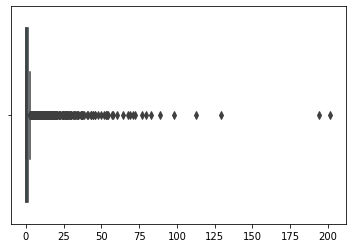

In [ ]:
sns.boxplot(reg_predict)

# Treinando um gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gb = GradientBoostingRegressor(random_state = 42)

In [ ]:
gb.fit(x_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
gb_predict = gb.predict(x_test)

In [ ]:
gb_predict

array([ 0.02242292, -0.01680662, -0.02201891, ...,  0.32247215,
       -0.02453552, -0.02388993])

In [ ]:
gb_predict[gb_predict < 0] = 0

In [ ]:
gb_predict

array([0.02242292, 0.        , 0.        , ..., 0.32247215, 0.        ,
       0.        ])

In [ ]:
resultados = pd.DataFrame()
resultados['revenue'] = y_test
resultados['predict'] = reg_predict
resultados['erro'] = reg_predict - y_test

In [ ]:
resultados[resultados.revenue > 0]

,revenue,predict,erro
3006,32.49,14.466139,-18.023861
5928,74.85,36.303301,-38.546699
8361,424.50,18.390118,-406.109882
8612,55.99,16.364838,-39.625162
416,15.19,22.474801,7.284801
4077,5.97,15.060042,9.090042
8146,27.19,13.354650,-13.835350
4908,372.65,129.471386,-243.178614
9395,29.98,20.635321,-9.344679
8728,101.95,88.953585,-12.996415


In [ ]:
np.sqrt(mean_squared_error(y_test, gb_predict))

23.10004349029805